# 1 Loading Libraries and Data

# 1.1 Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import gc

2022-08-06 17:32:39.196593: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-08-06 17:32:39.196701: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# 1.2 Loading Data

In [2]:
train=pd.read_csv("../input/training/train.csv.gzip",compression="gzip",dtype="float16")

# 1.3 Data size and structure

Here we understant the shape of the table. We found that we have an extra column in the data set. So we need to remove it.

In [3]:
train.shape

(5531451, 171)

In [4]:
train.head()

,Unnamed: 0,target,S_2,P_2,D_39,B_1,B_2,R_1,D_41,B_3,...,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_143,D_144,D_145
0,0.0,0.0,0.232056,0.638672,0.000000,0.000978,0.392578,0.002834,0.0,0.002096,...,-0.5,-0.125,-0.5,-0.142822,0.0,0.0,0.0,0.0,0.000454,0.0
1,1.0,0.0,0.236328,0.637695,0.000000,0.000552,0.390137,0.001889,0.0,0.001207,...,-0.5,-0.125,-0.5,-0.142822,0.0,0.0,0.0,0.0,0.004089,0.0
2,2.0,0.0,0.238770,0.649414,0.016388,0.002430,0.393555,0.002092,0.0,0.004192,...,-0.5,-0.125,-0.5,-0.142822,0.0,0.0,0.0,0.0,0.005199,0.0
3,3.0,0.0,0.242554,0.653809,0.000000,0.001535,0.390869,0.000422,0.0,0.002460,...,-0.5,-0.125,-0.5,-0.142822,0.0,0.0,0.0,0.0,0.004860,0.0
4,4.0,0.0,0.245850,0.645020,0.000000,0.001704,0.390137,0.002335,0.0,0.004143,...,-0.5,-0.125,-0.5,-0.142822,0.0,0.0,0.0,0.0,0.006050,0.0


When we save the dataframe as csv the datatypes are not maintained. So we need to reassign the data types. 

In [5]:
train["target"]=train["target"].astype("int8")

Drop the extra added column

In [6]:
train.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
train.head()

,target,S_2,P_2,D_39,B_1,B_2,R_1,D_41,B_3,D_43,...,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_143,D_144,D_145
0,0,0.232056,0.638672,0.000000,0.000978,0.392578,0.002834,0.0,0.002096,0.007229,...,-0.5,-0.125,-0.5,-0.142822,0.0,0.0,0.0,0.0,0.000454,0.0
1,0,0.236328,0.637695,0.000000,0.000552,0.390137,0.001889,0.0,0.001207,0.007229,...,-0.5,-0.125,-0.5,-0.142822,0.0,0.0,0.0,0.0,0.004089,0.0
2,0,0.238770,0.649414,0.016388,0.002430,0.393555,0.002092,0.0,0.004192,0.007229,...,-0.5,-0.125,-0.5,-0.142822,0.0,0.0,0.0,0.0,0.005199,0.0
3,0,0.242554,0.653809,0.000000,0.001535,0.390869,0.000422,0.0,0.002460,0.007229,...,-0.5,-0.125,-0.5,-0.142822,0.0,0.0,0.0,0.0,0.004860,0.0
4,0,0.245850,0.645020,0.000000,0.001704,0.390137,0.002335,0.0,0.004143,0.007229,...,-0.5,-0.125,-0.5,-0.142822,0.0,0.0,0.0,0.0,0.006050,0.0


# 1.4 Reduce the size of Data

In [8]:
for col in train.columns:
    if col not in ['customer_ID', 'target']:
        train[col]=train[col].astype("float16")
train["target"]=train["target"].astype("int8")

# 2 Splitting the Data 

In [9]:
train_y=train["target"].copy()

In [10]:
train_x=train.loc[:,train.columns!="target"]

In [11]:
del train

Get a glimps of train_x and train_y

In [12]:
train_y

0          0
1          0
2          0
3          0
4          0
          ..
5531446    0
5531447    0
5531448    0
5531449    0
5531450    0
Name: target, Length: 5531451, dtype: int8

In [13]:
train_x

,S_2,P_2,D_39,B_1,B_2,R_1,D_41,B_3,D_43,D_44,...,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_143,D_144,D_145
0,0.232056,0.638672,0.000000,0.000978,0.392578,0.002834,0.0,0.002096,0.007229,0.0,...,-0.5,-0.125,-0.5,-0.142822,0.0,0.0,0.0,0.0,0.000454,0.0
1,0.236328,0.637695,0.000000,0.000552,0.390137,0.001889,0.0,0.001207,0.007229,0.0,...,-0.5,-0.125,-0.5,-0.142822,0.0,0.0,0.0,0.0,0.004089,0.0
2,0.238770,0.649414,0.016388,0.002430,0.393555,0.002092,0.0,0.004192,0.007229,0.0,...,-0.5,-0.125,-0.5,-0.142822,0.0,0.0,0.0,0.0,0.005199,0.0
3,0.242554,0.653809,0.000000,0.001535,0.390869,0.000422,0.0,0.002460,0.007229,0.0,...,-0.5,-0.125,-0.5,-0.142822,0.0,0.0,0.0,0.0,0.004860,0.0
4,0.245850,0.645020,0.000000,0.001704,0.390137,0.002335,0.0,0.004143,0.007229,0.0,...,-0.5,-0.125,-0.5,-0.142822,0.0,0.0,0.0,0.0,0.006050,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,0.254639,0.666504,0.076477,0.002337,0.322754,0.001071,0.0,0.011185,0.001407,0.0,...,-0.5,-0.125,-0.5,-0.142822,0.0,0.0,0.0,0.0,0.001115,0.0
5531447,0.256348,0.670410,0.054657,0.000809,0.316895,0.001813,0.0,0.010544,0.000936,0.0,...,-0.5,-0.125,-0.5,-0.142822,0.0,0.0,0.0,0.0,0.006123,0.0
5531448,0.257080,0.669434,0.081970,0.001475,0.317871,0.001061,0.0,0.005493,0.000652,0.0,...,-0.5,-0.125,-0.5,-0.142822,0.0,0.0,0.0,0.0,0.005043,0.0
5531449,0.257812,0.660156,0.081970,0.001105,0.391113,0.001572,0.0,0.003817,0.001408,0.0,...,-0.5,-0.125,-0.5,-0.142822,0.0,0.0,0.0,0.0,0.000869,0.0


Free the memory space

In [14]:
gc.collect()

148

# 3 Training a model

Important link for hyperparameter tuning (https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e)

In [15]:
# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
# instantiate a distribution strategy
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

2022-08-06 17:35:41.640380: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-06 17:35:41.643390: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-08-06 17:35:41.643424: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-06 17:35:41.643456: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (36d150b67fb7): /proc/driver/nvidia/version does not exist
2022-08-06 17:35:41.646626: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [16]:
# instantiating the model in the strategy scope creates the model on the TPU
with tpu_strategy.scope():
    model=keras.Sequential([layers.Dense(units=338,activation="relu",input_shape=[169]),layers.BatchNormalization(),layers.Dense(units=676,activation="relu"),layers.BatchNormalization(),layers.Dense(units=1352,activation="relu",kernel_regularizer=keras.regularizers.l1_l2(0.001)),layers.BatchNormalization(),layers.Dense(units=676,activation="relu",kernel_regularizer=keras.regularizers.l1_l2(0.001)),layers.BatchNormalization(),layers.Dense(units=338,activation="relu",kernel_regularizer=keras.regularizers.l1_l2(0.01)),layers.BatchNormalization(),layers.Dense(units=1,activation="sigmoid")])

In [17]:
model.compile(loss="binary_crossentropy",optimizer=keras.optimizers.Adam(learning_rate=0.00005))

In [18]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [19]:
history=model.fit(x=train_x,y=train_y,batch_size=40000,epochs=200,validation_split=0.3,use_multiprocessing=True,class_weight={0:20,1:1},callbacks=[early_stopping],shuffle=True,validation_batch_size=17000)

2022-08-06 17:35:53.020300: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1308741070 exceeds 10% of free system memory.


Epoch 1/200
97/97 [==============================] - ETA: 0s - loss: 165.4256

2022-08-06 17:36:14.933191: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 560889368 exceeds 10% of free system memory.


97/97 [==============================] - 21s 137ms/step - loss: 165.3757 - val_loss: 146.5376
Epoch 2/200
97/97 [==============================] - 3s 27ms/step - loss: 146.7451 - val_loss: 129.9213
Epoch 3/200
97/97 [==============================] - 3s 26ms/step - loss: 129.2501 - val_loss: 113.4459
Epoch 4/200
97/97 [==============================] - 3s 26ms/step - loss: 112.4401 - val_loss: 97.7558
Epoch 5/200
97/97 [==============================] - 3s 28ms/step - loss: 96.7044 - val_loss: 83.1841
Epoch 6/200
97/97 [==============================] - 3s 27ms/step - loss: 82.1362 - val_loss: 69.8855
Epoch 7/200
97/97 [==============================] - 3s 27ms/step - loss: 68.8804 - val_loss: 57.9207
Epoch 8/200
97/97 [==============================] - 3s 27ms/step - loss: 56.9681 - val_loss: 47.3047
Epoch 9/200
97/97 [==============================] - 3s 27ms/step - loss: 46.4521 - val_loss: 38.0247
Epoch 10/200
97/97 [==============================] - 3s 26ms/step - loss: 37.3093 - 

Minimum validation loss: 0.6152225136756897


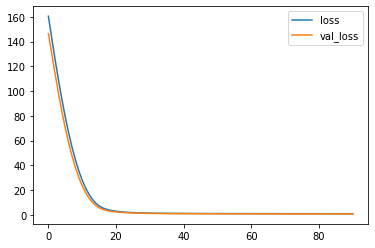

In [20]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 338)               57460     
_________________________________________________________________
batch_normalization (BatchNo (None, 338)               1352      
_________________________________________________________________
dense_1 (Dense)              (None, 676)               229164    
_________________________________________________________________
batch_normalization_1 (Batch (None, 676)               2704      
_________________________________________________________________
dense_2 (Dense)              (None, 1352)              915304    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1352)              5408      
_________________________________________________________________
dense_3 (Dense)              (None, 676)               9

In [22]:
del train_x
del train_y

In [23]:
gc.collect()

91869

Here we free up space as training data is not needed now.

# 4 Load the test data

In [24]:
test=pd.read_csv("../input/test-7/test_7.csv.gzip",compression="gzip")

In [25]:
test.head()

,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,D_41,B_3,...,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_143,D_144,D_145
0,0,e669dd27dd84dfc5bd8ee32baf39a2ea89252657ef17ad...,0.2754,0.5510,0.05000,0.01288,0.4373,0.0,0.0,0.002506,...,-0.5,-0.125,-0.5,-0.1428,0.0,0.0,0.0,0.0,0.007385,0.0
1,1,e669dd27dd84dfc5bd8ee32baf39a2ea89252657ef17ad...,0.2776,0.6180,0.00000,0.01823,0.5425,0.0,0.0,0.007423,...,-0.5,-0.125,-0.5,-0.1428,0.0,0.0,0.0,0.0,0.004894,0.0
2,2,e669dd27dd84dfc5bd8ee32baf39a2ea89252657ef17ad...,0.2798,0.6130,0.05554,0.02713,0.5410,0.0,0.0,0.005726,...,-0.5,-0.125,-0.5,-0.1428,0.0,0.0,0.0,0.0,0.002337,0.0
3,3,e669dd27dd84dfc5bd8ee32baf39a2ea89252657ef17ad...,0.2820,0.6190,0.06110,0.04608,0.5390,0.0,0.0,0.002390,...,-0.5,-0.125,-0.5,-0.1428,0.0,0.0,0.0,0.0,0.001159,0.0
4,4,e669dd27dd84dfc5bd8ee32baf39a2ea89252657ef17ad...,0.2842,0.6143,0.00000,0.00558,0.5430,0.0,0.0,0.002780,...,-0.5,-0.125,-0.5,-0.1428,0.0,0.0,0.0,0.0,0.007256,0.0


In [26]:
test.shape

(1136379, 171)

In [27]:
for col in test.columns:
    if col not in ['customer_ID', 'target']:
        test[col]=test[col].astype("float16")

# 5 Split the test data

In [28]:
customerID=test["customer_ID"].copy()

In [29]:
del test["customer_ID"]
del test["Unnamed: 0"]

In [30]:
gc.collect()

21

# 5 Fit the Data

In [31]:
target=pd.DataFrame(model.predict(x=test))

2022-08-06 17:42:08.930780: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 384096102 exceeds 10% of free system memory.


In [32]:
output=pd.concat([customerID,target],axis=1)

In [33]:
output.columns=["customer_ID","target"]

In [34]:
output.to_csv("output7.csv")